## В этом ноутбуке:
1. Работаем с датасетом Fashion Mnist
2. Сделаем и обучим модель, которая будет классифицировать объекты из этого датасета. Всего классов 10
3. Посмотрим на более сложную модель, но дающую лучший результат на валидационной выборке
4. Посмотрим что такое Callbacks
5. Сделаем для нашей модели из п.2 Callback-tqdm, Callback для Keras, Callback для сохранения модели и напишем свой произвольный Callback

In [1]:
# Необходимые импорты
from keras import Sequential
import keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Reshape, InputLayer, Dropout
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Датасет встроен в Keras, так что его можно легко скачать:

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

В датасете всего 10 классов, перечислим их в списке fashion_mnist_labels:

In [9]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


Также посмотрим на изображения:

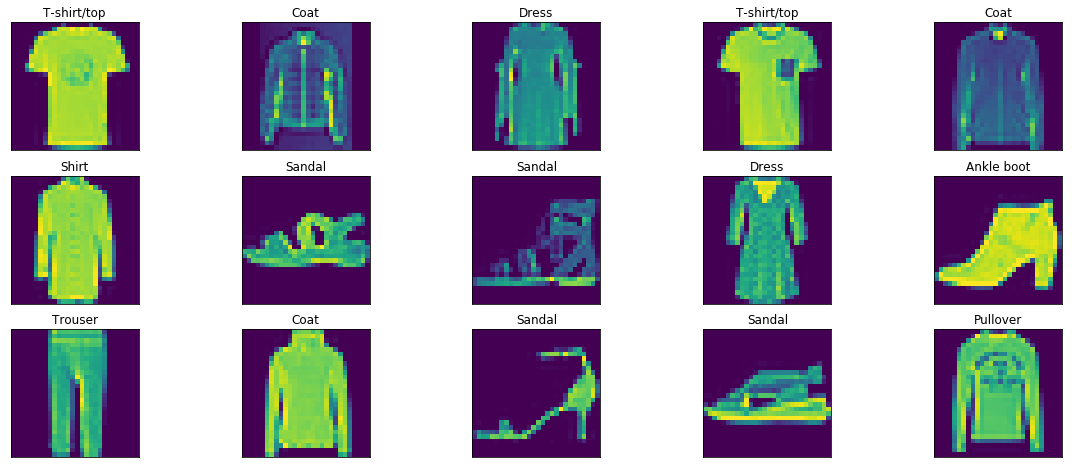

In [10]:
# Печатаем случайно выбранные 15 изображений:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    true_index = y_test[index]
    ax.set_title("{}".format(fashion_mnist_labels[true_index]))

Посмотрим каково число объектов в выборках:

In [12]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Число объектов в обучающей/тестовой выборках:
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


Посмотрим как выглядит y_train/y_test

In [21]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

__Вопрос__: Задача классификации, значит что необходимо сделать с y_train/y_test?

In [5]:
# <Your code>

Теперь объявим модель. Можете использовать любые слои и всё, что мы узнали за прошедшую неделю

Модель должна достичь примерно 0.83 accuracy на валидачионной выборке

In [31]:
# <Your code>

In [26]:
# Скомпилировать модель:
# <Your code>

In [37]:
# Сделать fit. 10% выборки отвести под валидационную
# <Your code>

In [39]:
# Оценить качество модели на тестовом наборе:
# <Your code>

Теперь сделаем небольшую визуализацию того, как работает модель:

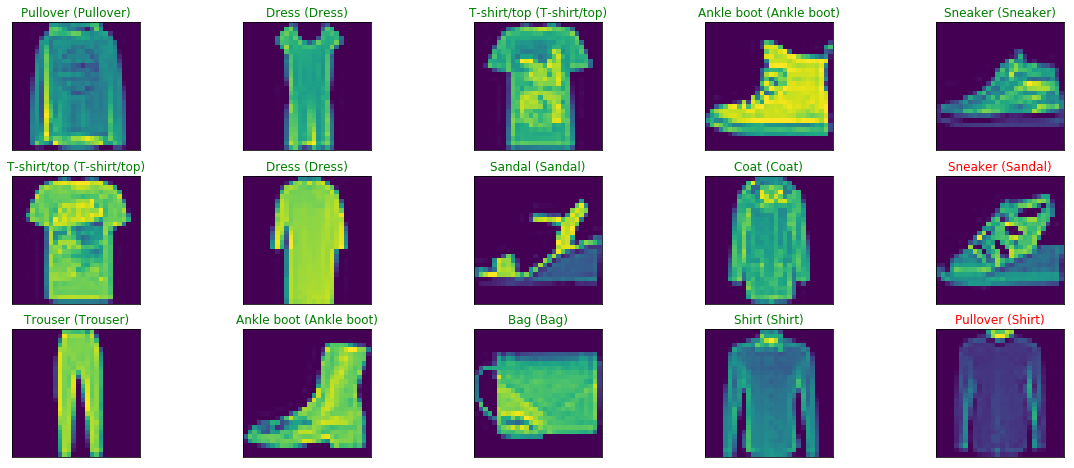

In [12]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Посмотрим теперь только на неверно предсказанные объекты:

In [61]:
y_hat_argmax = np.argmax(y_hat, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)
choose_wrong = ~(y_hat_argmax == y_test_argmax)
y_hat_wrong = y_hat[choose_wrong]
y_test_wrong = y_test[choose_wrong]
x_test_wrong = x_test[choose_wrong]

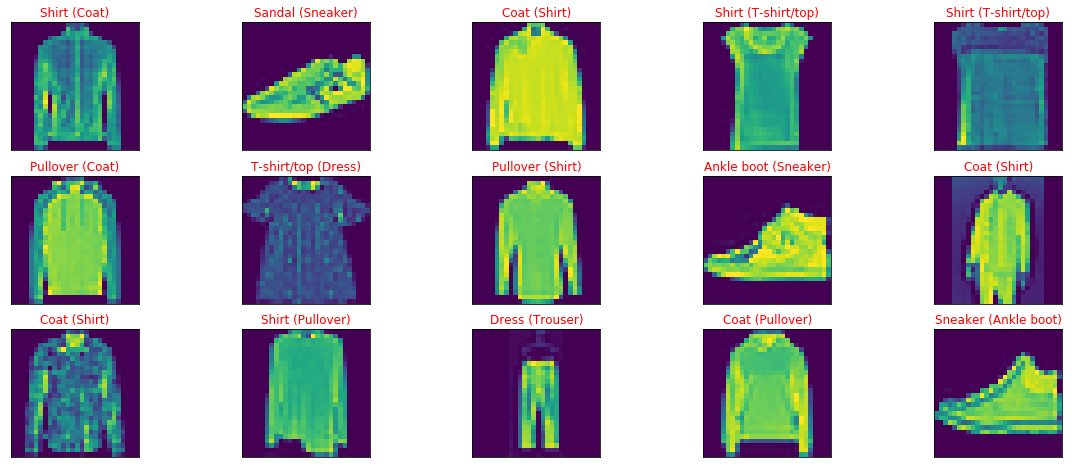

In [62]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(y_hat_wrong.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test_wrong[index]))
    predict_index = np.argmax(y_hat_wrong[index])
    true_index = np.argmax(y_test_wrong[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Наконец, соберем метрики по каждому отдельному классу. Для этого есть метод classification_report в sklearn:

In [63]:
from sklearn.metrics import classification_report
y_test_arg = np.argmax(y_test, axis=1)
y_hat_arg = np.argmax(y_hat, axis=1)

print(classification_report(y_test_arg, y_hat_arg, target_names=fashion_mnist_labels))

             precision    recall  f1-score   support

T-shirt/top       0.86      0.77      0.81      1000
    Trouser       0.99      0.96      0.98      1000
   Pullover       0.80      0.82      0.81      1000
      Dress       0.89      0.88      0.88      1000
       Coat       0.75      0.79      0.77      1000
     Sandal       0.95      0.96      0.96      1000
      Shirt       0.62      0.67      0.64      1000
    Sneaker       0.94      0.94      0.94      1000
        Bag       0.98      0.96      0.97      1000
 Ankle boot       0.96      0.95      0.95      1000

avg / total       0.87      0.87      0.87     10000



In [14]:
# Другая модель:

In [64]:
from keras.layers import Activation, BatchNormalization, MaxPooling2D
from keras.optimizers import SGD
chanDim = -1
classes = 10
INIT_LR = 1e-2

model = Sequential()
model.add(InputLayer((28, 28)))
model.add(Reshape((28, 28, -1)))

# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))

# return the constructed network architecture

In [66]:
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / 30)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [67]:
model.fit(x=x_train, y=y_train, epochs=30, batch_size=32, verbose=0,
          validation_split=0.1, callbacks=[TQDMNotebookCallback(leave_inner=True)])

HBox(children=(IntProgress(value=0, description='Training', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=54000), HTML(value='')))

Как видно, модель примерно на 5-ой эпохе достигает качества 0.92. А к 10-ой эпохе ~0.93

__Вопрос:__ Почему на некоторых эпохах accuracy < val_accuracy ?

## TODO
Дальше вставить блок про Callbacks и кастомные метрики. Но лучше этот блок перенести в визитки